In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [32]:
INIT_LR = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 50


In [33]:
classes = ['Non_Fire', 'Fire']
images = []
labels = []


In [34]:
# Load and preprocess images
for c in classes:
    try:
        for img_name in os.listdir('Image Dataset/' + c):
            img = cv2.imread('Image Dataset/' + c + '/' + img_name)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(int(c == 'Fire'))  # Simplified label assignment
    except:
        pass

In [35]:
print(f"Loaded {len(images)} images")

Loaded 4127 images


In [36]:
# Ensure each image has a corresponding label
assert len(images) == len(labels), "Number of images and labels should be equal"

In [37]:
images = np.array(images, dtype='float32') / 255.
labels = np.array(labels).reshape(-1, 1)  # Reshape labels to (None, 1) instead of (None,)


In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, shuffle=True, random_state=42)

In [39]:
# Reshape input data for LSTM
X_train = X_train.reshape(-1, 128, 128*3)
X_test = X_test.reshape(-1, 128, 128*3)



In [40]:
# Create LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(128, 128*3), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # Changed to 1 unit and sigmoid activation
# Compile model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Display model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128, 128)          262656    
                                                                 
 dropout_5 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                      

In [41]:
# Train the model
print("[INFO] Training network...")
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_test, y_test))


[INFO] Training network...
Epoch 1/50
97/97 [==============================] - 42s 344ms/step - loss: 0.7197 - accuracy: 0.5809 - val_loss: 0.6020 - val_accuracy: 0.6890
Epoch 2/50
97/97 [==============================] - 31s 318ms/step - loss: 0.6290 - accuracy: 0.6614 - val_loss: 0.5923 - val_accuracy: 0.7093
Epoch 3/50
97/97 [==============================] - 30s 313ms/step - loss: 0.6209 - accuracy: 0.6711 - val_loss: 0.8440 - val_accuracy: 0.4709
Epoch 4/50
97/97 [==============================] - 32s 331ms/step - loss: 0.6057 - accuracy: 0.6798 - val_loss: 0.7007 - val_accuracy: 0.6386
Epoch 5/50
97/97 [==============================] - 31s 320ms/step - loss: 0.5958 - accuracy: 0.6998 - val_loss: 0.5439 - val_accuracy: 0.7413
Epoch 6/50
97/97 [==============================] - 30s 313ms/step - loss: 0.6228 - accuracy: 0.6617 - val_loss: 0.7663 - val_accuracy: 0.6483
Epoch 7/50
97/97 [==============================] - 30s 314ms/step - loss: 0.5936 - accuracy: 0.6908 - val_loss: 0.

In [42]:
# Save the model
model.save('output/fire_detection_lstm_updated.h5')

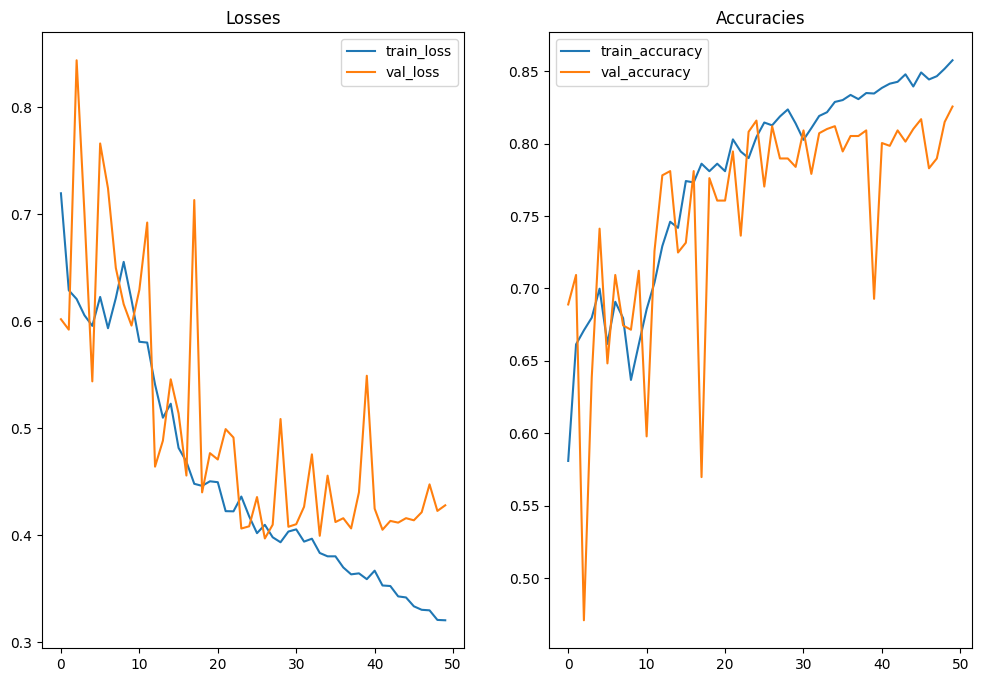

In [43]:
# Plot training history
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Losses')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracies')
plt.legend()

plt.savefig("output/training_plot_lstm_updated.png")
plt.show()